In [8]:
%matplotlib inline
#%matplotlib notebook
%config InlineBackend.figure_format='retina'

import cv2
from matplotlib import pyplot as plt
import numpy as np

In [9]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

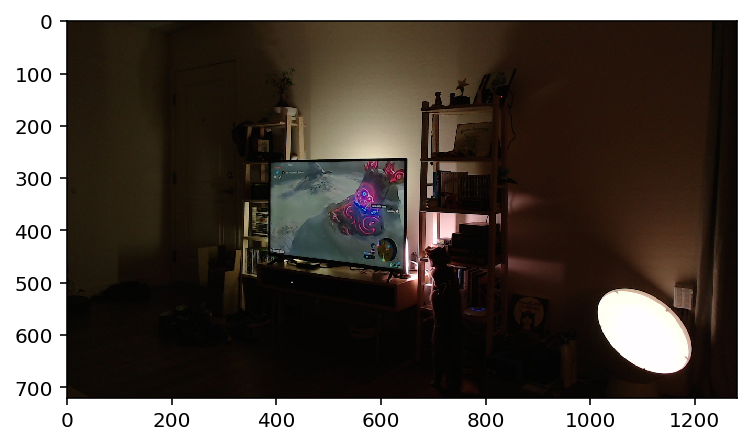

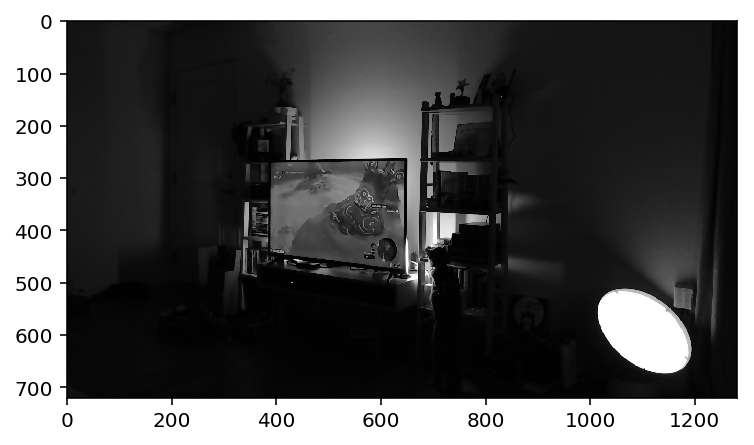

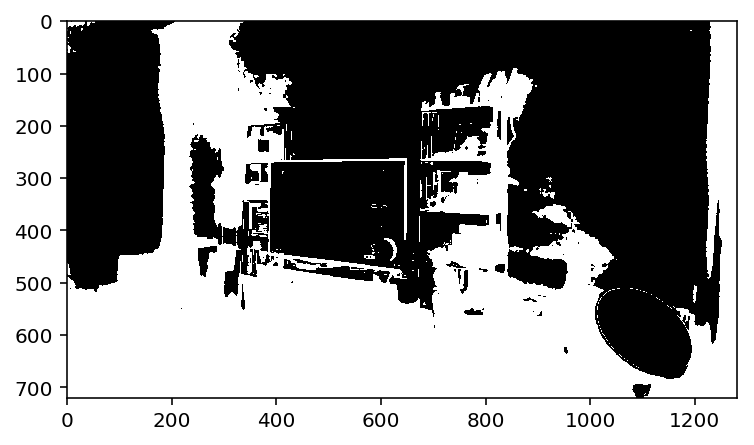

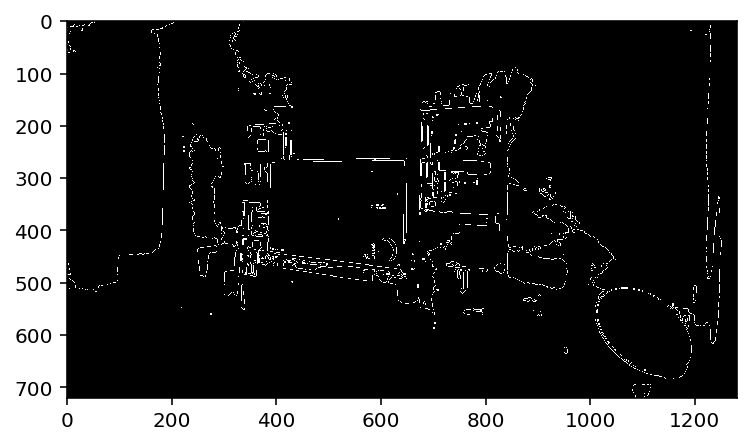

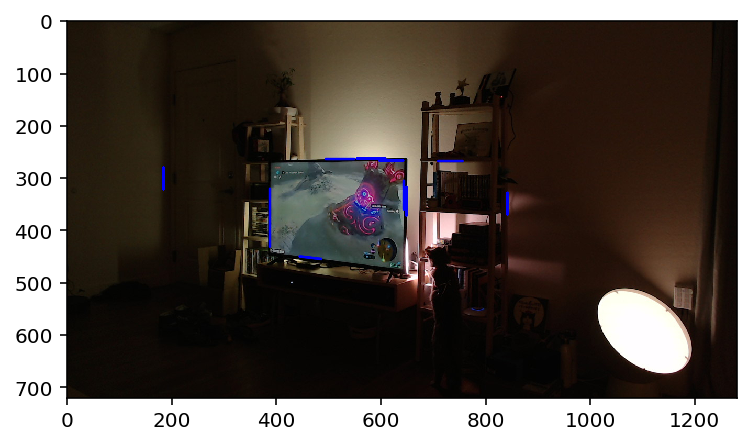

In [10]:
sixteen_by_nine_bright = cv2.imread('../test_images/dim16by9.jpg', cv2.IMREAD_COLOR)
sixteen_by_nine_bright = cv2.cvtColor(sixteen_by_nine_bright, cv2.COLOR_BGR2RGB)

plt.imshow(sixteen_by_nine_bright)
plt.show()

gray = cv2.cvtColor(sixteen_by_nine_bright, cv2.COLOR_RGB2GRAY)
gray = cv2.bilateralFilter(gray, 7, 14, 14)

plt.imshow(gray, cmap='gray')
plt.show()

_,thresh = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)
#kernel = np.ones((5,5), np.uint8)
#thresh = cv2.erode(thresh, kernel, iterations=1)

plt.imshow(thresh, cmap='gray')
plt.show()

edges = auto_canny(thresh)

plt.imshow(edges, cmap='gray')
plt.show()

minLineLength = 300
maxLineGap = 60

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
a,b,c = lines.shape
for i in range(a):
    cv2.line(sixteen_by_nine_bright, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    
plt.imshow(sixteen_by_nine_bright)
plt.show()

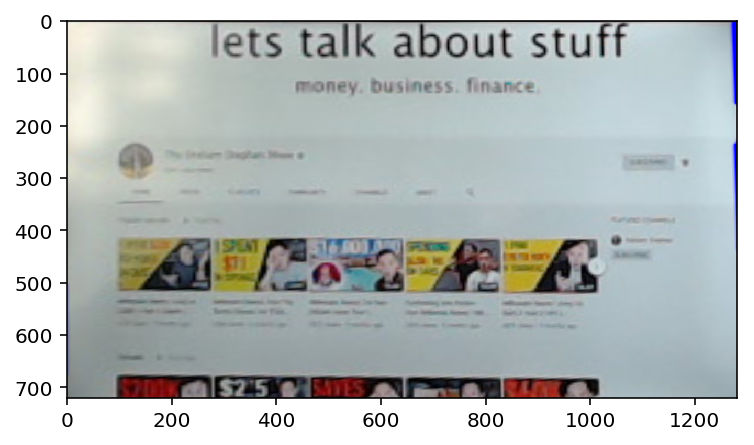

In [7]:
height, width, _ = sixteen_by_nine_bright.shape

tv_corners = np.float32([[390,270],[644,266],[390,437],[638,465]])
full_canvas = np.float32([[0,0],[width,0],[0,height],[width,height]])

M = cv2.getPerspectiveTransform(tv_corners, full_canvas)
dst = cv2.warpPerspective(sixteen_by_nine_bright, M, (width, height))

plt.imshow(dst)
plt.show()